In [2]:
import os
from torchvision import datasets, transforms

dataset_path = r'clasification-roi'

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'train'), transform=transform)

def display_dataset_dimensions(dataset):
    num_images = len(dataset)  # Total number of images
    num_classes = len(dataset.classes)  # Number of unique classes
    print("Dataset Dimension:")
    print(f"Total Images: {num_images}")
    print(f"Number of Classes: {num_classes}")
    print(f"Classes: {dataset.classes}")

# Display the dimensions of the dataset
display_dataset_dimensions(train_dataset)


Dataset Dimension:
Total Images: 20434
Number of Classes: 2
Classes: ['Benign', 'Malignant']


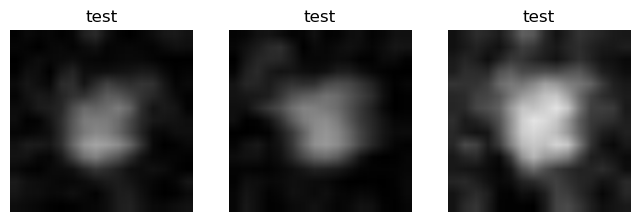

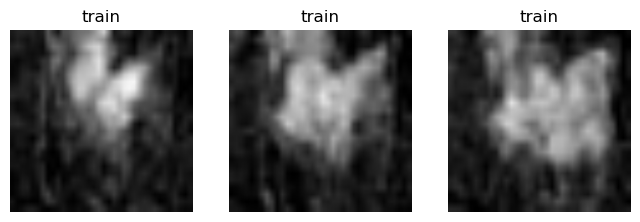

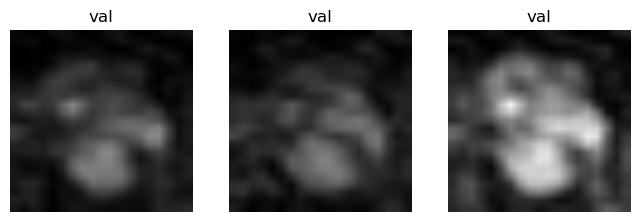

In [8]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Define the transformation for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to PyTorch tensors
])

# Load the dataset
dataset = datasets.ImageFolder("clasification-roi", transform=transform)
class_names = dataset.classes

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

def display_random_images(data_loader, class_names, num_images=3):
    for class_index, class_name in enumerate(class_names):
        # Filter the dataset for the specific class
        images = []
        labels = []
        for img, label in dataset:
            if label == class_index:
                images.append(img)
                labels.append(label)
            if len(images) == num_images:
                break

        # Display the images
        plt.figure(figsize=(8, 4))
        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # Convert CHW to HWC
            plt.title(class_name)
            plt.axis('off')
        plt.show()

display_random_images(data_loader, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Set: Benign = 5559, Malignant = 14875
Test Set: Benign = 1938, Malignant = 4913
Validation Set: Benign = 408, Malignant = 1581


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


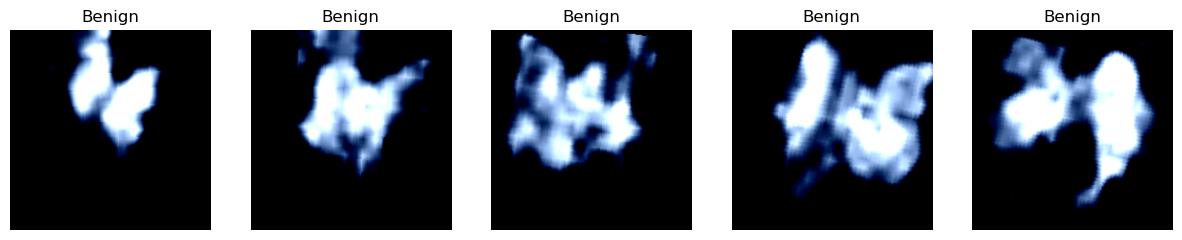

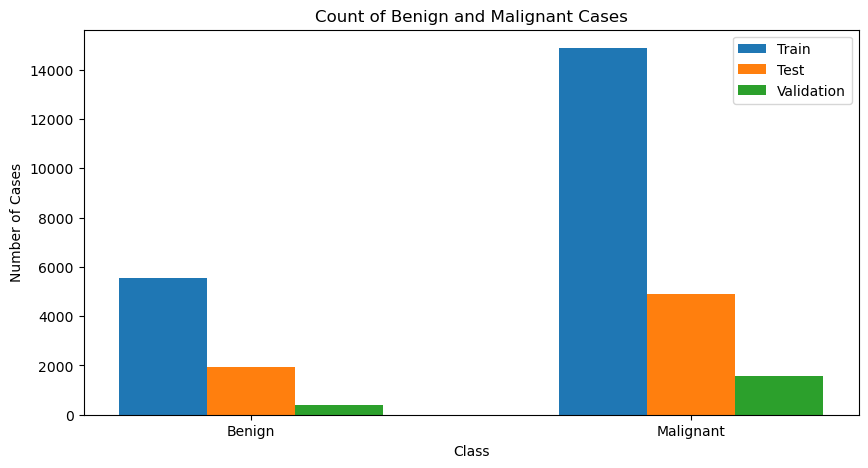

In [10]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the dataset path
dataset_path = "clasification-roi"  # Update this to your dataset path

# Define transformations for training dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomCrop(210),  # Randomly crop images to 210x210
    transforms.RandomHorizontalFlip(),  # Horizontal flipping
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

# Define transformations for validation and test datasets
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])


valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])


train_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'train'), transform=train_transform)
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'test'), transform=test_transform)
valid_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'val'), transform=valid_transform)  # Assuming you have a 'valid' folder


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


benign_count_train = train_dataset.targets.count(0)  
malignant_count_train = train_dataset.targets.count(1)  
print(f'Train Set: Benign = {benign_count_train}, Malignant = {malignant_count_train}')

benign_count_test = test_dataset.targets.count(0)  
malignant_count_test = test_dataset.targets.count(1)  
print(f'Test Set: Benign = {benign_count_test}, Malignant = {malignant_count_test}')

benign_count_valid = valid_dataset.targets.count(0)  
malignant_count_valid = valid_dataset.targets.count(1)  
print(f'Validation Set: Benign = {benign_count_valid}, Malignant = {malignant_count_valid}')


def display_sample_images(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        image, label = dataset[i]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image.permute(1, 2, 0).numpy())  # Convert tensor to image format
        plt.title(dataset.classes[label])
        plt.axis('off')
    plt.show()


display_sample_images(train_dataset)


labels = ['Benign', 'Malignant']
train_counts = [benign_count_train, malignant_count_train]
test_counts = [benign_count_test, malignant_count_test]
valid_counts = [benign_count_valid, malignant_count_valid]

x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, train_counts, width=0.2, label='Train', align='center')
plt.bar([p + 0.2 for p in x], test_counts, width=0.2, label='Test', align='center')
plt.bar([p + 0.4 for p in x], valid_counts, width=0.2, label='Validation', align='center')

plt.xlabel('Class')
plt.ylabel('Number of Cases')
plt.title('Count of Benign and Malignant Cases')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
plt.show()

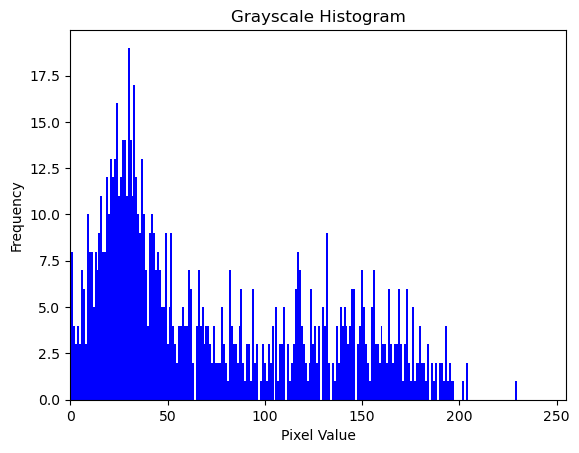

Most frequent pixel values and their frequencies:
Pixel Value: 30, Frequency: 19
Pixel Value: 33, Frequency: 17
Pixel Value: 24, Frequency: 16
Pixel Value: 27, Frequency: 14
Pixel Value: 31, Frequency: 14


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r'D:\Infosys\clasification-roi\train\Benign\BreaDM-Be-1801\SUB1\p-034.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate and flatten the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()

# Get the top 5 most frequent pixel values
top_n = 5
most_frequent_indices = np.argsort(hist)[-top_n:][::-1]

# Plot the histogram
plt.bar(range(256), hist, color='blue', width=1.0)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.show()

# Print the most frequent pixel values and their frequencies
print("Most frequent pixel values and their frequencies:")
for idx in most_frequent_indices:
    print(f"Pixel Value: {idx}, Frequency: {int(hist[idx])}")


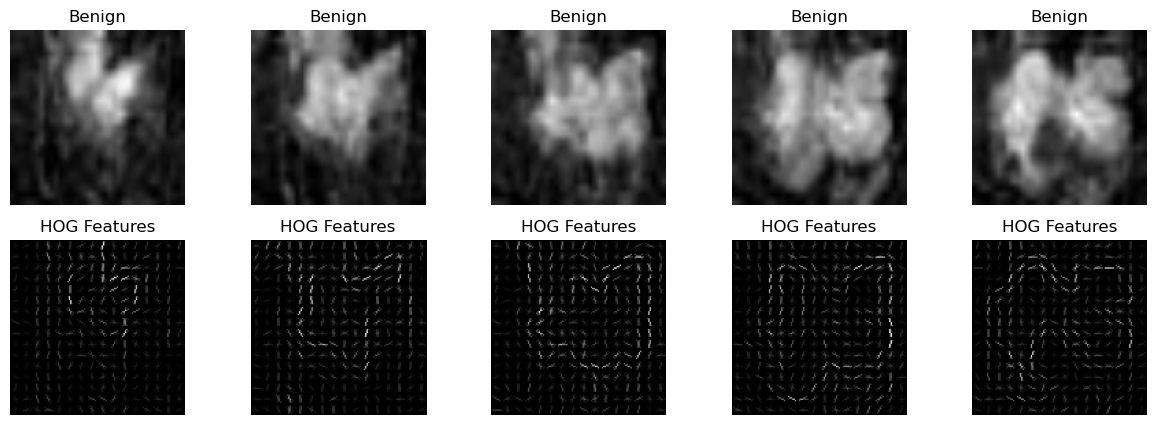

In [16]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from skimage.feature import hog
from skimage import color
import matplotlib.pyplot as plt
import numpy as np

# Define the dataset path
dataset_path = "clasification-roi" # Update this to your dataset path

# Define transformations for training dataset (resize images, as HOG operates on fixed-size images)
resize_transform = transforms.Compose([
    transforms.Resize((128, 128)),  # HOG typically works well with smaller images
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'train'), transform=resize_transform)
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'test'), transform=resize_transform)
valid_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'val'), transform=resize_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# Function to extract HOG features from a dataset image
def extract_hog_features(image):
    image_np = image.permute(1, 2, 0).numpy()  # Convert tensor to NumPy array
    image_gray = color.rgb2gray(image_np)  # Convert RGB image to grayscale
    hog_features, hog_image = hog(image_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),block_norm='L2-Hys', visualize=True, feature_vector=True)
    return hog_features, hog_image

# Display HOG feature for a sample image
def display_hog_sample(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        image, label = dataset[i]
        hog_features, hog_image = extract_hog_features(image)
        plt.subplot(2, num_images, i + 1)
        plt.imshow(image.permute(1, 2, 0).numpy())  # Original image
        plt.title(dataset.classes[label])
        plt.axis('off')

        plt.subplot(2, num_images, i + num_images + 1)
        plt.imshow(hog_image, cmap='gray')  # HOG visualization
        plt.title('HOG Features')
        plt.axis('off')
    plt.show()

# Example of HOG features for training images
display_hog_sample(train_dataset)


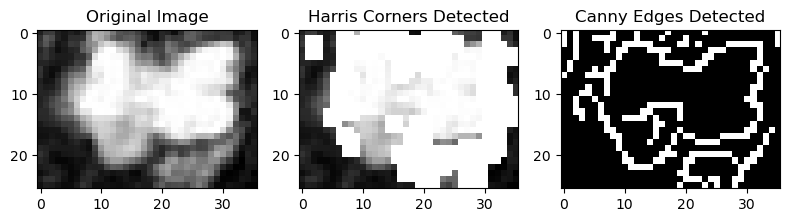

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image, block_size=2, ksize=3, k=0.04):
    """
    Function to detect corners using the Harris Corner Detection algorithm.
    """
    # Convert the image to float32 (required by the Harris function)
    gray_image = np.float32(image)

    # Apply Harris corner detection
    harris_response = cv2.cornerHarris(gray_image, block_size, ksize, k)

    # Dilate the corners to enhance visibility
    harris_response = cv2.dilate(harris_response, None)

    # Thresholding to mark the corners on the original image
    corners_image = image.copy()
    corners_image[harris_response > 0.01 * harris_response.max()] = 255

    return corners_image

def canny_edge_detection(image, lower_threshold=100, upper_threshold=200):
    """
    Function to apply Canny Edge Detection on an image.
    """
    # Apply Canny edge detection
    edges = cv2.Canny(image, lower_threshold, upper_threshold)
    return edges

# Load the input image (update file path as needed)
input_image_path = r'D:\Infosys\clasification-roi\train\Benign\BreaDM-Be-1801\SUB6\p-035.jpg'

# Read the image in grayscale
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image not found at path: {input_image_path}. Please check the file path.")

# Apply Harris corner detection
corners_image = harris_corner_detection(image)

# Apply Canny edge detection
edges_image = canny_edge_detection(image)

# Convert images for display in Jupyter Notebook
corners_image_rgb = cv2.cvtColor(corners_image, cv2.COLOR_GRAY2RGB)
edges_image_rgb = cv2.cvtColor(edges_image, cv2.COLOR_GRAY2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(corners_image_rgb)
plt.title('Harris Corners Detected')

plt.subplot(1, 3, 3)
plt.imshow(edges_image_rgb)
plt.title('Canny Edges Detected')

plt.tight_layout()
plt.show()


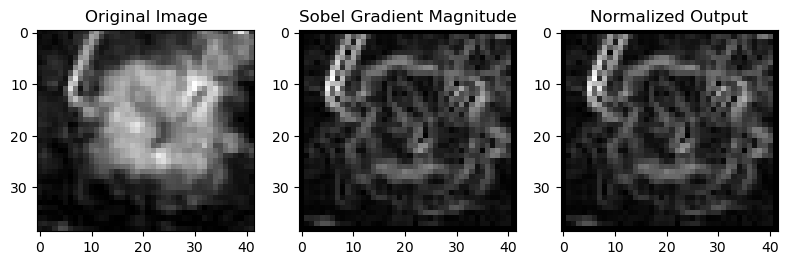

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],[0,  0,  0],[1,  2,  1]])

# Function to apply convolution between image and kernel
def apply_convolution(image, kernel):
    # Get image dimensions
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Output image (zero padded to keep the same size)
    output_image = np.zeros((height, width))

    # Apply convolution
    for i in range(1, height-1):
        for j in range(1, width-1):
            region = image[i-1:i+2, j-1:j+2]  # 3x3 region around the pixel
            output_image[i, j] = np.sum(region * kernel)

    return output_image

# Function to compute gradient magnitude from Sobel outputs
def compute_gradient_magnitude(sobel_x_output, sobel_y_output):
    return np.sqrt(sobel_x_output**2 + sobel_y_output**2)

# Function to normalize the image for display
def normalize_image(image):
    image_min = np.min(image)
    image_max = np.max(image)
    normalized_image = (image - image_min) / (image_max - image_min) * 255
    return normalized_image.astype(np.uint8)

# Load your image (replace 'your_image.jpg' with the path to your image file)
input_image_path = r'clasification-roi/train/Malignant/BreaDM-Ma-1802/SUB1/p-035.jpg'

image = Image.open(input_image_path).convert('L')  # Convert to grayscale

# Convert the image to a NumPy array
image_array = np.array(image)

# Apply Sobel operators
sobel_x_output = apply_convolution(image_array, sobel_x)
sobel_y_output = apply_convolution(image_array, sobel_y)

# Calculate gradient magnitude (Sobel magnitude)
sobel_magnitude = compute_gradient_magnitude(sobel_x_output, sobel_y_output)

# Normalize the output image for better visualization
normalized_output = normalize_image(sobel_magnitude)

# Display the results
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Gradient Magnitude')

plt.subplot(1, 3, 3)
plt.imshow(normalized_output, cmap='gray')
plt.title('Normalized Output')

plt.tight_layout()
plt.show()


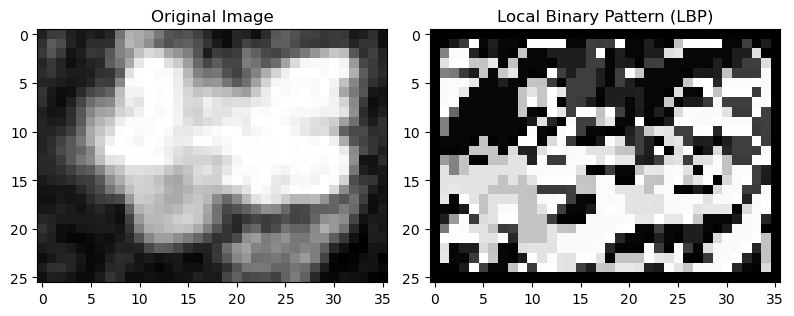

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def local_binary_pattern(image, radius=1, neighbors=8):
    # Get image dimensions
    height, width = image.shape

    # Initialize the LBP image
    lbp_image = np.zeros((height, width), dtype=np.uint8)

    # Define the angle step based on the number of neighbors
    angle_step = 2 * np.pi / neighbors

    # Calculate the LBP
    for i in range(radius, height - radius):
        for j in range(radius, width - radius):
            center_pixel = image[i, j]
            lbp_code = 0

            for n in range(neighbors):
                # Calculate the coordinates of the neighbor
                y = int(i + radius * np.sin(n * angle_step))
                x = int(j + radius * np.cos(n * angle_step))
                
                # Update the LBP code
                if image[y, x] >= center_pixel:
                    lbp_code |= 1 << n

            # Set the LBP value in the output image
            lbp_image[i, j] = lbp_code

    return lbp_image

# Load the input image (correct the file path)
input_image_path = r'D:\Infosys\clasification-roi\train\Benign\BreaDM-Be-1801\SUB6\p-035.jpg'  # Use raw string notation
# Read the image in grayscale
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image not found at path: {input_image_path}. Please check the file path.")

# Calculate the LBP
lbp_image = local_binary_pattern(image)

# Display the original and LBP images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title('Local Binary Pattern (LBP)')

plt.tight_layout()
plt.show()


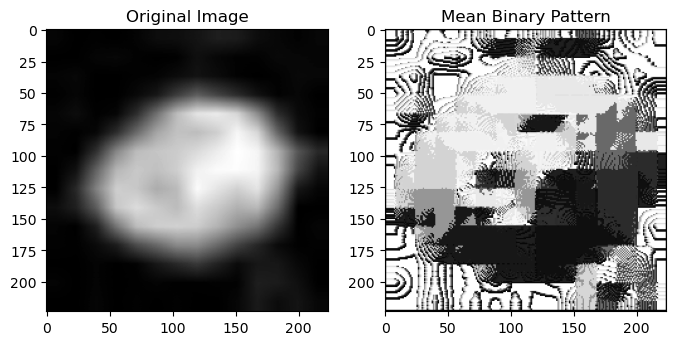

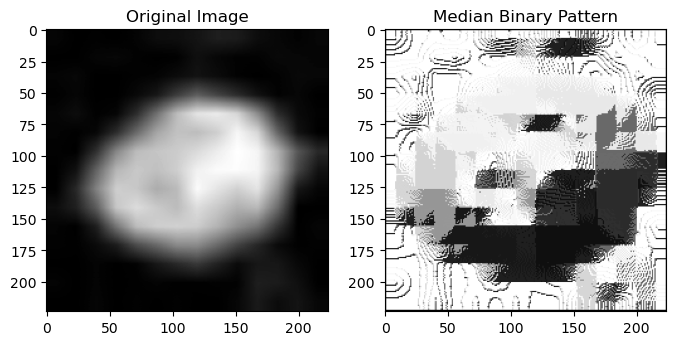

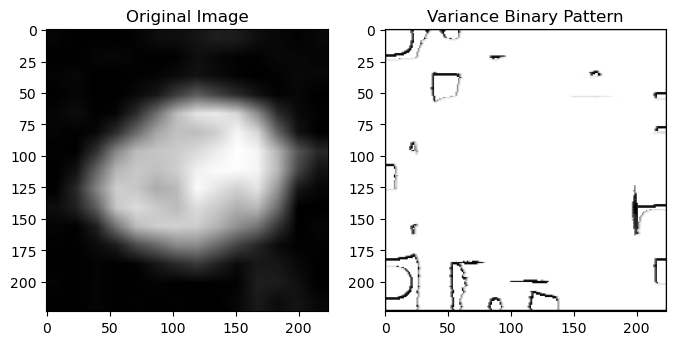

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def binary_pattern(image_path, method='mean'):
    # Load the image in grayscale using OpenCV
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, (224, 224))

    # Get the dimensions of the image
    rows, cols = img_array.shape

    # Initialize the output image
    bp_image = np.zeros((rows, cols), dtype=np.uint8)

    # Loop over the image, skipping the border pixels
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Extract the 3x3 neighborhood
            surr = img_array[i-1:i+2, j-1:j+2]

            # Calculate the reference value based on the selected method
            if method == 'mean':
                ref_val = np.mean(surr)
            elif method == 'median':
                ref_val = np.median(surr)
            elif method == 'variance':
                ref_val = np.var(surr)
            else:
                raise ValueError("Invalid method! Use 'mean', 'median', or 'variance'.")

            # Initialize the binary pattern
            binary_pattern = 0

            # Create the binary pattern by comparing neighbors to the reference value
            for ind, (dy, dx) in enumerate([(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]):
                if surr[1 + dy, 1 + dx] >= ref_val:
                    binary_pattern += 2 ** ind

            # Set the binary pattern value for the current pixel
            bp_image[i, j] = binary_pattern

    # Normalize the output image for display
    bp_image_normalized = (bp_image / bp_image.max()) * 255

    # Display the original and binary pattern images
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(bp_image_normalized, cmap='gray')
    plt.title(f'{method.capitalize()} Binary Pattern')

    plt.show()

# Example usage
image_path = './clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-019.jpg'
binary_pattern(image_path, method='mean')     # For Mean Binary Pattern
binary_pattern(image_path, method='median')   # For Median Binary Pattern
binary_pattern(image_path, method='variance') # For Variance Binary Pattern
